# Import Dependencies and Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv("Resources/crypto_data.csv")

# Data Preprocessing

In [3]:
# Drop unused columns
crypto_df = crypto_df.drop(["Unnamed: 0", "CoinName"], axis=1)
print(crypto_df.count())
crypto_df.head()

Algorithm          1252
IsTrading          1252
ProofType          1252
TotalCoinsMined     744
TotalCoinSupply    1252
dtype: int64


,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,X11,True,PoW/PoS,NaN,2300000000
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SHA-256,True,PoW,NaN,611000
4,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Drop rows not currently being traded then drop the column
trading_df = crypto_df.loc[crypto_df["IsTrading"] == True, :]
trading_df = trading_df.drop(["IsTrading"], axis=1)
print(trading_df.count())
trading_df.head()

Algorithm          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# Drop rows with null values
no_nulls_df = trading_df.dropna(how="any")
print(no_nulls_df.count())
no_nulls_df.head()

Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [6]:
# Filter for total coins mined greater than 0
mined_df = no_nulls_df.loc[no_nulls_df["TotalCoinsMined"] > 0, :]
print(mined_df.count())
mined_df.head()

Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [7]:
# Convert column from object to numeric
mined_df["TotalCoinSupply"] = pd.to_numeric(mined_df["TotalCoinSupply"])

<ipython-input-7-afa77bf64bf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mined_df["TotalCoinSupply"] = pd.to_numeric(mined_df["TotalCoinSupply"])


In [8]:
data = pd.get_dummies(mined_df)
print(data.count())
data.head()

TotalCoinsMined                     532
TotalCoinSupply                     532
Algorithm_1GB AES Pattern Search    532
Algorithm_536                       532
Algorithm_Argon2d                   532
                                   ... 
ProofType_Proof of Authority        532
ProofType_Proof of Trust            532
ProofType_TPoS                      532
ProofType_Zero-Knowledge Proof      532
ProofType_dPoW/PoW                  532
Length: 98, dtype: int64


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Scale data
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)

# Dimensionality Reduction

In [10]:
# Use PCA to reduce dimensions
pca = PCA(n_components=.90)
data_pca = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=data_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.326378e-15,-1.280445e-15,-0.007129,-1.319756,-0.051813,...,-4.948116e-16,3.888930e-15,-1.114145e-15,-1.150971e-15,-7.726513e-16,-3.626465e-16,-3.860201e-15,1.147464e-15,1.733755e-15,-1.388184e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.457883e-15,-1.429030e-15,-0.007739,-1.322514,-0.056674,...,-4.936877e-16,3.702121e-15,7.995353e-16,-1.148781e-15,-7.102306e-16,-1.603443e-16,-3.350430e-15,8.459994e-16,1.233071e-15,-3.191346e-16
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-7.481406e-15,6.356089e-15,-0.054781,-1.542879,-0.943951,...,-3.646047e-14,-4.706507e-14,1.542434e-14,4.329981e-14,-5.319318e-14,-2.722470e-14,2.747110e-14,-5.248317e-14,-6.197070e-15,-1.494373e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,3.040430e-15,-1.007631e-15,-0.002071,0.281463,0.251862,...,-8.634350e-16,-1.033727e-14,-6.523311e-15,8.423110e-15,-1.192233e-14,-5.998331e-16,1.071340e-14,-9.861862e-15,-1.296452e-14,-1.000959e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,1.674182e-15,-1.227687e-15,0.027735,0.519099,0.188820,...,1.284903e-13,-4.695079e-14,-1.009913e-13,-1.083722e-14,-1.847076e-14,-1.811094e-13,3.493308e-14,-1.592085e-14,-7.333712e-14,-9.778724e-14


### Using PCA to reduce dimensions and preserve 90% of explained variance caused the number of columns to reduce from 98 to 74.

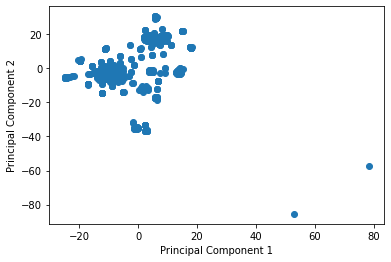

In [11]:
# Use t-SNE to further reduce the dataset dimensions
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pca_df)
tsne_df = pd.DataFrame({"Principal Component 1": tsne_features[:,0], "Principal Component 2": tsne_features[:,1]})

# show scatter plot of t-SNE features
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### The t-SNE dimension reduction seems to give us two larger somewhat distinct clusters and one smaller but distinct cluster. It appears to be 3 clusters in total with a couple of outliers.

# Cluster Analysis

C:\Users\khutula\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


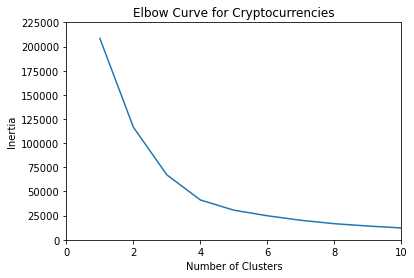

In [12]:
# Use KMeans to determine optimal number of clusters between 1 and 10
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# collect data for elbow curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

# plot elbow curve
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xlim([0,10])
plt.ylim([0,225000])
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Cryptocurrencies")
plt.show()

In [13]:
# Classify data based on 5 clusters
model = KMeans(n_clusters=5, random_state=42)
model.fit(tsne_df)
predictions = model.predict(tsne_df)
tsne_df["class"] = model.labels_

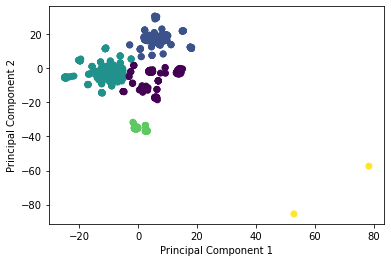

In [15]:
# Plot classified data
plt.scatter(tsne_df['Principal Component 1'], tsne_df['Principal Component 2'], c=tsne_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Recommendation

### Based on my analysis and findings, I would recommend to the client that cryptocurrencies can be clustered together, and that the provided data suggests five clusters.  One consideration to take into account is that one of these five clusters appears to be significant outliers in the data.  These could indicate either errors in the data or simply a significant difference between the other cryptocurrencies. I would recommend collecting more data to be certain that this model works, as we lost almost half the data during initial cleaning due to empty values or no trading being performed on that crypto.